In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [2]:
# Configure the theme
sns.set_theme()

In [3]:
# Helper function
def get_clantats_by_mode(mode_id: int, players: DataFrame, to_insert: DataFrame):
    for clantag in players.keys():
        temp = {'clantag': clantag, 'total_battles': players[clantag][f'battles_in_{mode_id}'].sum(), 'players': len(players[clantag].index)}
        temp['average_battles'] = temp['total_battles'] / temp['players']
        to_insert = to_insert.append(temp, ignore_index=True)
    return to_insert

In [4]:
data = pd.read_csv('csvs/aw_players.csv')

In [5]:
# Base dataframe
dataframe = DataFrame(data, columns=['nickname', 'battles_in_0','spotting_in_0', 'kills_in_0', 'dmg_in_0', 'winrate_in_0', 'battles_in_1','dmg_in_1','winrate_in_1', 'clantag', 'spotting_in_1', 'kills_in_1','is_stats_closed'])

### Данные о датасете

In [6]:
dataframe.describe()


,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000,26608.000000
mean,2042.038748,357.312284,0.684912,1329.587774,47.265274,1852.907622,8257.195866,76.796373,2005.558105,5.520543
std,4242.481662,171.497974,0.468042,925.889823,12.918800,3340.816251,5345.407481,17.274762,1163.370428,2.049892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,255.267131,0.360000,691.712500,44.900000,76.000000,4018.975000,72.100000,1174.399123,4.330000
50%,360.500000,338.409247,0.610000,1121.465000,48.500000,502.000000,7332.860000,79.500000,1860.455428,5.650000
75%,1879.000000,447.522809,0.930000,1733.510000,51.900000,2047.250000,11836.057500,85.700000,2711.082332,6.870000
max,52757.000000,2184.500000,6.000000,9221.800000,100.000000,45041.000000,38845.020000,100.000000,9855.333333,20.440000


### Дистрибуция игроков по боям(все игроки из выборки)

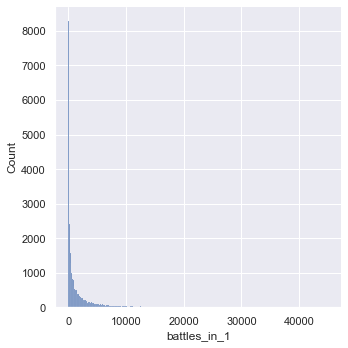

In [7]:
sns.displot(data=dataframe, x='battles_in_1')

### Дистрибуция игроков по урону(все игроки из выборки)

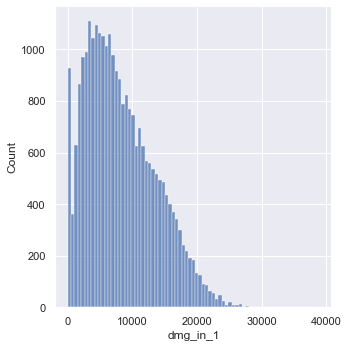

In [8]:
sns.displot(data=dataframe, x='dmg_in_1')


### Топ игроков по количеству боёв

In [46]:
dataframe.sort_values('battles_in_1', ascending=False).head(10)[['clantag', 'nickname', 'battles_in_1', 'dmg_in_1', 'winrate_in_1', 'kills_in_1']]

,clantag,nickname,battles_in_1,dmg_in_1,winrate_in_1,kills_in_1
5358,H0TS,katzz,45041.0,19107.45,94.0,8.69
5739,Араб,m920,39455.0,13462.27,91.7,6.17
8543,FORC1,Штормсс260р,35950.0,15005.40,82.4,6.41
2749,RusTD,boroda71,35030.0,12470.11,86.0,5.73
24598,B_P,Котофей_Иваныч,34849.0,16791.63,85.2,8.54
5636,ВекХХ,oSTALKERo,34685.0,17187.70,88.1,8.63
8849,1PZBH,jonn,34639.0,9712.86,86.2,6.28
19089,VE_DI,silps,34113.0,19965.53,93.9,8.59
5012,Goal,Lisovski2015,33627.0,12423.83,93.9,7.50
10027,ИВЛ,boroda957,32514.0,16120.97,89.0,7.61


In [10]:
clantags = dataframe.clantag.unique()
players = {}

In [11]:
for clantag in clantags:
    players[clantag] = dataframe.loc[dataframe['clantag'] == clantag]

In [12]:
clans_stats = pd.DataFrame(columns=['clantag', 'total_battles', 'players', 'average_battles'])

In [13]:
clans_stats = get_clantats_by_mode(1, players, clans_stats)

<ipython-input-3-db4ced57e9f3>:5: RuntimeWarning: invalid value encountered in double_scalars
  temp['average_battles'] = temp['total_battles'] / temp['players']


In [14]:
clans_stats.describe()

,total_battles,average_battles
count,2000.000000,1999.000000
mean,22283.456500,2075.297306
std,44383.221036,3063.753388
min,0.000000,0.000000
25%,585.750000,221.000000
50%,4528.000000,930.782609
75%,21354.000000,2671.991684
max,488395.000000,34639.000000


In [15]:
sorted_df_avg = clans_stats.sort_values('average_battles', ascending=False)
sorted_df_avg_fitred_more_15_players = sorted_df_avg.loc[sorted_df_avg['players'] >= 15]

### Топ кланов по среднему количеству боёв в PvE
Черная линия — среднее значение по кланам из датасета(Только по тем, число бойцов которых превышает 15 человек)

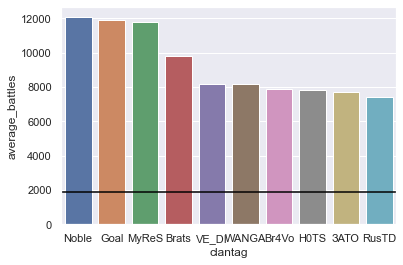

In [16]:
sorted_df_avg_fitred_more_15_players_top_10_players = sorted_df_avg_fitred_more_15_players.head(10)

top_clans_ = sns.barplot(x=sorted_df_avg_fitred_more_15_players_top_10_players['clantag'], y=sorted_df_avg_fitred_more_15_players_top_10_players['average_battles'], label='Average PvE battles per clan' )
hor_line = top_clans_.axhline(y=sorted_df_avg_fitred_more_15_players['average_battles'].mean(), c='black', animated=True)
hor_line.set_label('Average value for dataset')

In [17]:
player_that_have_more_than_1k_battles_in_pve = dataframe.loc[(dataframe['battles_in_0'] > 100) & (dataframe['battles_in_1'] > 100)]

### Дистрибуция игроков по боям(battles in PvE > 100)

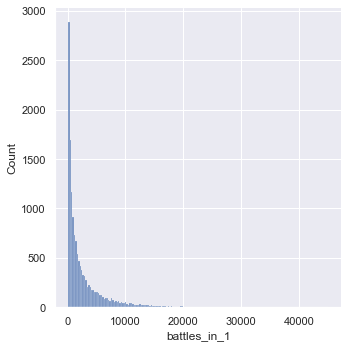

In [18]:
sns.displot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1')

### Дистрибуция игроков по урону(battles in PvE and PvP > 100)

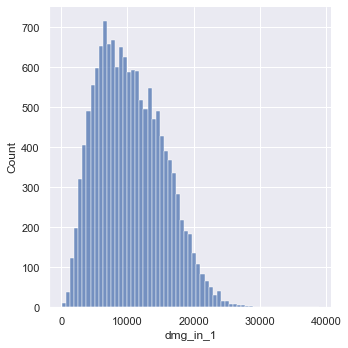

In [19]:
sns.displot(data=player_that_have_more_than_1k_battles_in_pve, x='dmg_in_1')

### Корреляция урона в PvP от урона в PvE

Text(0, 0.5, 'Damage in PvP')

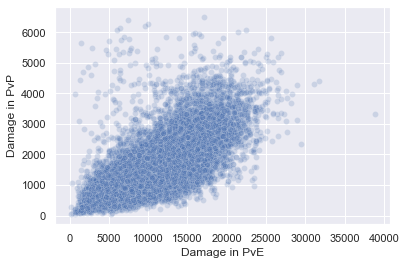

In [20]:
damage_plot = sns.scatterplot(x=player_that_have_more_than_1k_battles_in_pve['dmg_in_1'], y=player_that_have_more_than_1k_battles_in_pve['dmg_in_0'], alpha=0.2)
damage_plot.set_xlabel('Damage in PvE')
damage_plot.set_ylabel('Damage in PvP')


#### Градиентный график

Text(0, 0.5, 'Damage in PvP')

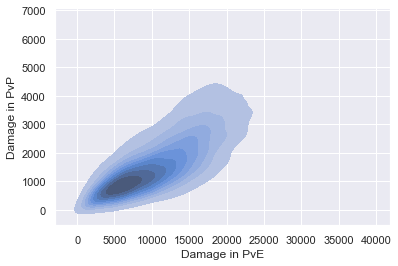

In [21]:
dmg = sns.kdeplot(data=player_that_have_more_than_1k_battles_in_pve,x='dmg_in_1', y='dmg_in_0', fill=True, common_grid=True)
dmg.set_xlabel('Damage in PvE')
dmg.set_ylabel('Damage in PvP')

#### Регрессионная линия 

Text(0, 0.5, 'Damage in PvP')

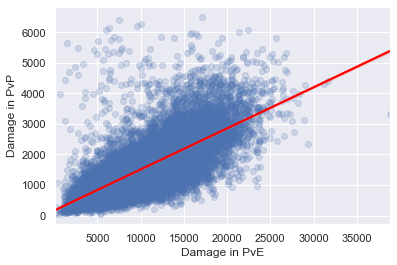

In [22]:
reg = sns.regplot(data=player_that_have_more_than_1k_battles_in_pve,x='dmg_in_1', y='dmg_in_0',scatter_kws={'alpha': 0.2}, line_kws={'color': 'red'})
reg.set_xlabel('Damage in PvE')
reg.set_ylabel('Damage in PvP')

### Корреляция винрейта в PvP от винрейта в PvE

Text(0, 0.5, 'Winrate in PvP')

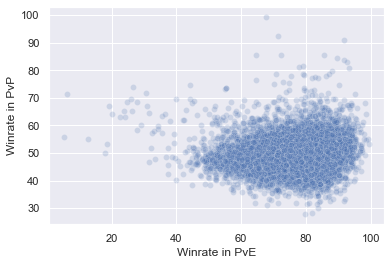

In [23]:
winrate_plot = sns.scatterplot(data=player_that_have_more_than_1k_battles_in_pve, x='winrate_in_1', y='winrate_in_0',  alpha=0.2)
winrate_plot.set_xlabel('Winrate in PvE')
winrate_plot.set_ylabel('Winrate in PvP')

#### Градиентный график

Text(0, 0.5, 'Winrate in PvP')

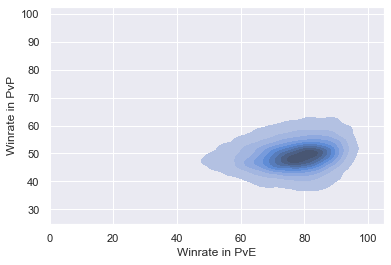

In [24]:
wr = sns.kdeplot(data=player_that_have_more_than_1k_battles_in_pve, x='winrate_in_1', y='winrate_in_0', fill=True, common_grid=True)
wr.set_xlabel('Winrate in PvE')
wr.set_ylabel('Winrate in PvP')

In [25]:
player_that_have_more_than_1k_battles_in_pve.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000,14572.000000
mean,3286.592163,407.827513,0.752766,1573.825760,49.410314,2788.348133,10464.144359,76.928795,2491.468679,6.116058
std,5106.886064,149.283961,0.421526,948.728109,5.001198,3885.865377,4999.884973,9.130120,1046.910993,1.670872
min,101.000000,19.670846,0.010000,39.650000,27.700000,101.000000,125.470000,5.400000,86.358779,0.300000
25%,380.000000,299.463863,0.440000,872.962500,46.400000,446.000000,6480.110000,71.700000,1716.059345,5.007500
50%,1232.500000,380.425081,0.690000,1351.715000,49.100000,1296.000000,9938.080000,78.000000,2367.540716,6.150000
75%,3888.000000,493.970845,0.990000,2070.260000,51.900000,3459.500000,14043.740000,83.400000,3116.759111,7.230000
max,51652.000000,1555.478197,4.470000,6506.210000,99.400000,45041.000000,38845.020000,99.400000,8577.955142,15.700000


### Гистограмма винрейта в PvE(учитываются игроки, которые отыграли более 100 боёв в PvE И в PvP)

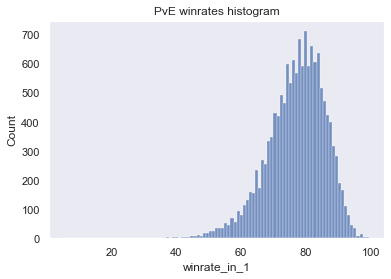

In [26]:
wr_pve_hist = sns.histplot(data=player_that_have_more_than_1k_battles_in_pve, x='winrate_in_1')
wr_pve_hist.set_title('PvE winrates histogram')
wr_pve_hist.grid(False)

### Гистограмма боёв в PvE(учитываются игроки, которые отыграли более 100 боёв в PvE И в PvP)

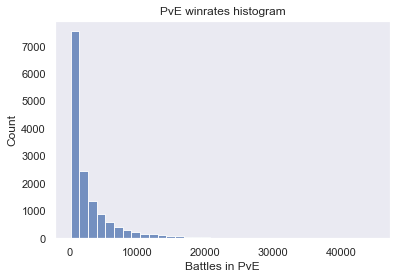

In [27]:
battles_pve_hist = sns.histplot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1', bins=35)
battles_pve_hist.set_title('PvE winrates histogram')
battles_pve_hist.set_xlabel('Battles in PvE')
battles_pve_hist.grid(False)

### Корреляция винрейта от количества боёв

Text(0, 0.5, 'Winrate in PvE')

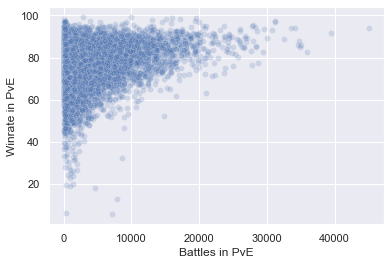

In [28]:
winrate_to_battles_plot = sns.scatterplot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1', y='winrate_in_1', alpha=0.2)
winrate_to_battles_plot.set_xlabel('Battles in PvE')
winrate_to_battles_plot.set_ylabel('Winrate in PvE')

### Корреляция среднего урона от количества боёв

Text(0, 0.5, 'Damage in PvE')

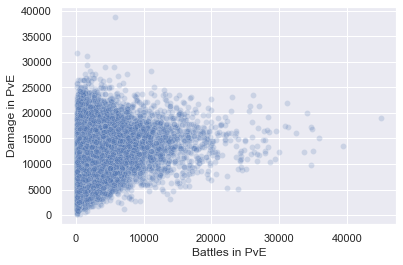

In [31]:
damage_to_battles_pve = sns.scatterplot(data=player_that_have_more_than_1k_battles_in_pve, x='battles_in_1', y='dmg_in_1', alpha=0.2)
damage_to_battles_pve.set_xlabel('Battles in PvE')
damage_to_battles_pve.set_ylabel('Damage in PvE')

### Корреляция фрагов от среднего урона

Text(0, 0.5, 'Average kills in PvE')

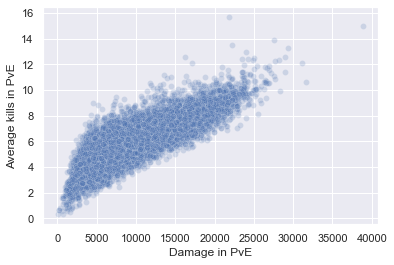

In [30]:
damage_to_kills = sns.scatterplot(data=player_that_have_more_than_1k_battles_in_pve, x='dmg_in_1', y='kills_in_1', alpha=0.2)
damage_to_kills.set_xlabel('Damage in PvE')
damage_to_kills.set_ylabel('Average kills in PvE')

In [38]:
player_that_have_more_than_10k_battles_in_pve = dataframe.loc[(dataframe['battles_in_1'] > 10000) & (dataframe['battles_in_0'] > 100)]

In [54]:
player_that_have_more_than_10k_battles_in_pve.describe()

,battles_in_0,spotting_in_0,kills_in_0,dmg_in_0,winrate_in_0,battles_in_1,dmg_in_1,winrate_in_1,spotting_in_1,kills_in_1
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,3226.696682,408.699490,0.877299,1625.396185,50.436611,14962.228673,14194.616706,82.880924,3247.409012,7.179739
std,4902.373726,128.562549,0.506219,774.345902,5.943049,4841.079030,3872.763297,7.101020,905.792575,1.437797
min,102.000000,117.924915,0.060000,167.240000,37.100000,10001.000000,3059.000000,52.100000,675.846245,2.700000
25%,481.500000,314.093484,0.500000,1051.992500,46.700000,11494.750000,11587.885000,78.475000,2631.446805,6.300000
50%,1554.500000,393.648718,0.800000,1518.285000,49.600000,13539.500000,14381.520000,83.800000,3234.406550,7.280000
75%,3587.500000,483.218644,1.132500,2093.012500,53.100000,16740.000000,16641.710000,88.000000,3845.989691,8.102500
max,51652.000000,995.399917,3.280000,4398.190000,91.000000,45041.000000,28177.700000,98.700000,6711.095664,12.400000


### Корреляция винрейта в PvP от количества боёв в PvE

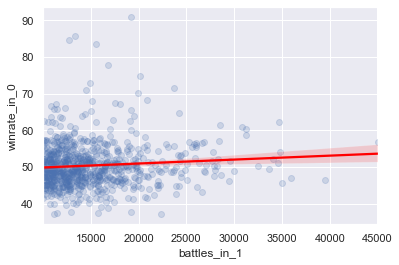

In [44]:
wr_in_pvp = sns.regplot(data=player_that_have_more_than_10k_battles_in_pve, x='battles_in_1', y='winrate_in_0', scatter_kws = {'alpha':0.2}, line_kws={'color': 'red'})

### Корреляция урона в PvP от количества боёв в PvE

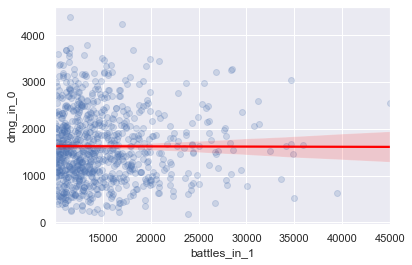

In [45]:
dmg_in_pvp_more_than_10k_in_pve = sns.regplot(data=player_that_have_more_than_10k_battles_in_pve, x='battles_in_1', y='dmg_in_0', scatter_kws = {'alpha':0.2}, line_kws={'color': 'red'})